# Problem Set 1: Empirical Problem - Estimating Agglomeration
**Kyle Hood (JHU)**  
**Fall, 2025**  

This problem explores the results reported by Ahlfeldt et al. in Sections 5.2 and 5.3.

---

## Setup
The data used in this problem are available in the file `berlin_36_86.parquet`. This file contains the data frame that we will be working with.

### Variables in the Data Frame
- **block_id**: An ID variable for each block  
- **area_id**: An ID variable for each district  
- **dummywest**: A dummy variable indicating West Berlin (1) or East Berlin (0)  
- **d_wall**: The distance to the inner Berlin Wall (in km)  
- **d_outb**: The distance to the outer wall separating West Berlin from the rest of East Germany (in km)  
- **d_cbd**: The distance to the central business district  
- **floor_1936**: The relative price of floor space in 1936  
- **floor_1986**: The relative price of floor space in 1986  
- **emp_wpl_1936**: Workplace employment in 1936  
- **emp_wpl_1986**: Workplace employment in 1986  
- **emp_rsd_1936**: Residents employment in 1936  
- **emp_rsd_1986**: Residents employment in 1986  

### Notes
- Several questions focus on West Berlin data. You can subset the data using Python's `pandas` library.
- Growth in a price or quantity is typically expressed as a **log difference**:
  - **Correct**: \( \Delta \log x_t = \log x_t - \log x_{t-1} \)
  - **Incorrect**: \( \Delta \log x_t \neq \log(x_t - x_{t-1}) \)
- When computing growth rates, omit observations where the value in one of the years is zero.

---

## Question 1: Understanding the Data [2 points]
### 1a: Focus on West Berlin data  
- Did the price of floor space become more or less dispersed between 1936 and 1986 in West Berlin?  
- What led you to this conclusion?

### 1b: Compare East and West Berlin  
- On average, was East or West Berlin more densely populated in 1936?  
- What led you to this conclusion?  
  *Note*: Assume all blocks are of equal area, and the employment-to-population ratio is the same for each block.

### 2a: Plots  
- Using Python's `matplotlib` or `seaborn` libraries, plot the log difference in the price of floor space and the difference in workplace employment between 1936 and 1986 in West Berlin against the distance from the inner Berlin Wall.  
  - Distance to the wall should be on the horizontal axis.  
  - Submit these plots with the problem set.  
- Are there relationships between the pairs of variables that each plot represents?

---

## Question 2: Estimation [4 points]
This question is based on Section 5.2 of Ahlfeldt et al. All calculations are done only with West Berlin data.

### 2a: Regressions  
1. **Regression 1**:  
   - Regress log differences in floor prices (1936–1986) on distance from CBD.  
   - Answer the following:
     - What is the estimated slope coefficient?  
     - How is this coefficient interpreted?  
     - Why is it important to look at (log) differences in prices rather than price levels or log-levels?

2. **Regression 2**:  
   - Regress the log difference in floor price on distance from CBD and a dummy variable for each district.  
     *Hint*: Use Python's `statsmodels` library to create dummies:  
     - What happened to the coefficient on distance from CBD compared to Regression 1?  
     - What is the interpretation of the difference in coefficients?

3. **Regression 3**:  
   - Regress the log difference in floor price on distance from CBD, a dummy variable for each district, and the distance from the inner and outer walls.  
     - What happened to the coefficient on distance from CBD compared to Regression 2?  
     - Why would the researcher wish to add distance from inner and outer walls to the regression?

4. **Regression 4**:  
   - Compute an indicator variable for the six grid cells as defined in the paper.  
   - Repeat the regressions in Regression 1 and Regression 3, replacing distance from CBD with the six-grid-cell indicator.  
     *Hint*: Use Python's `pandas` library or create six separate variables.  
     - Can you see a pattern of lower prices near the pre-war CBD in the indicator variable coefficients?  
     - Did this pattern change much when you added the additional covariates?  
     - Is there a good reason to use the grid cell version instead of the linear specification?

---

## Question 3: Comparison to Paper [2 points]
1. How do the regression specifications you ran differ from the regressions in columns (1) to (3) of Table 1 in the paper?  
2. Why did the authors estimate the regressions how they did?  
   - Compare columns (1) and (3) of Table 1 using the plot from Question 1.  
3. Consider land prices in the first grid cell from the Berlin Wall (0.75 km from the wall).  
   - What is the prediction of the model in the paper (using column (1)) on the percent change in land prices?  
     *Hint*: Look for the answer in the paper.

# Preliminaries: Set Working Directory and Load Data
Use `os` to set the working directory and `pandas` to load the data from a `.parquet` file equivalent to the RData file.

## Instructions:
1. Set the working directory to the folder containing the `.parquet` file.
2. Load the `.parquet` file using `pandas`.
3. Display the first few rows of the dataset using `.head()`.

In [27]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Set the working directory
os.chdir("c:/urban_economics/agglomeration/")

# Load the data (.parquet format)
data = pd.read_parquet("berlin_36_86.parquet")

# Display the first few rows of the dataset
print(data.head())

   block_id  area_id  dummywest    d_wall    d_outb     d_cbd  floor_1936  \
0    1001.0  1001000          1  2.446667  9.171771  4.976145    0.940052   
1    1005.0  1001000          1  1.113738  9.461269  3.794431    0.980144   
2    1006.0  1001000          1  0.810379  9.372357  3.624603    0.980144   
3    1007.0  1001000          1  3.013314  9.366148  5.051322    1.217992   
4    1009.0  1001000          1  1.168528  9.711312  3.683481    1.298132   

   floor_1986  emp_wpl_1936  emp_wpl_1986  emp_rsd_1936  emp_rsd_1986  
0    0.772863           0.0          15.0          30.0           0.0  
1    0.754665         256.0         497.0         106.0           0.0  
2    0.754665           0.0          15.0         106.0           0.0  
3    0.831672         349.0        1649.0         548.0         239.0  
4    0.754665         791.0         725.0         294.0          34.0  


# Question 1a/1b: Summary Statistics
Use `pandas` to calculate summary statistics for subsets of the data based on conditions.

## Instructions:
1. Filter the dataset to include only rows where `dummywest == 1` (West Berlin).
2. Calculate summary statistics for `floor_1936` and `floor_1986` for West Berlin.
3. Filter the dataset to include only rows where `dummywest == 0` (East Berlin).
4. Calculate summary statistics for `emp_rsd_1936` for West Berlin, East Berlin, and the entire dataset.
5. Display the calculated summary statistics for comparison.

In [28]:
# Filter data for West Berlin
west_berlin = data[data['dummywest'] == 1].copy()

# Calculate summary statistics for West Berlin
print(west_berlin[['floor_1936', 'floor_1986']].describe())

# Filter data for East Berlin
east_berlin = data[data['dummywest'] == 0].copy()

# Calculate summary statistics for employment residential data and display them
print(west_berlin['emp_rsd_1936'].describe())
print(east_berlin['emp_rsd_1936'].describe())
print(data['emp_rsd_1936'].describe())

        floor_1936   floor_1986
count  6260.000000  6260.000000
mean      1.094713     1.009159
std       0.339040     0.138498
min       0.613849     0.373501
25%       0.839612     0.944160
50%       0.998472     0.993195
75%       1.298132     1.082599
max       3.005926     2.051081
count    6260.000000
mean      162.837380
std       223.130241
min         0.000000
25%        22.000000
50%        68.500000
75%       223.000000
max      4934.000000
Name: emp_rsd_1936, dtype: float64
count    4522.000000
mean      123.790358
std       223.191598
min         0.000000
25%        15.000000
50%        36.000000
75%       124.000000
max      3371.000000
Name: emp_rsd_1936, dtype: float64
count    10782.000000
mean       146.460953
std        223.976044
min          0.000000
25%         19.000000
50%         53.000000
75%        178.000000
max       4934.000000
Name: emp_rsd_1936, dtype: float64


## Solution Question 1, 1a/1b: Understanding the Data

### 1a: Did the price of floor space become more or less dispersed between 1936 and 1986 in West Berlin?  
What led you to this conclusion?  

You are asked to consider the price of floor space in 1936 and 1986. To do this, we will use two variables: the price of floor space in 1936 (`floor_1936`) and the price of floor space in 1986 (`floor_1986`). We are asked to compare floor space in the two years in West Berlin only, meaning that we should subset the data.  

To look at dispersion, we can simply look at a summary of the data. In 1936, the range from the first to third quartile is 0.84–1.29, while in 1986, it was 0.944–1.08. This means that dispersion was greater in 1936 than in 1986—half of the blocks in 1986 fell between 0.944 and 1.08, while half in 1936 fell between 0.84 and 1.29, a much greater range.  

There may be other ways to look at dispersion, such as variance, other percentiles, or standard deviation. The general story is the same.

---

### 1b: On average, was East or West Berlin more densely populated in 1936?  
What led you to this conclusion?  

**Note**: Assume that all blocks are of equal area.  

You have to be a bit creative here, because we don’t really know population. But we know employment. The variable `emp_rsd_1936` is employment by block in 1936.  

We can either use the West Berlin data frame and compare it to the full data set, or we can make an East Berlin data frame (which is compared with the West Berlin one).  

Looking just at the average, there are 162.5 employed per block in West Berlin. Overall, employment per block is 146.5. This implies that West Berlin has more people per block, that is,

# Preliminaries: Calculate Log and Percent Changes
Use `numpy` to calculate log differences and percent changes for specified columns.

## Instructions:
1. Calculate the log difference for `floor_1936` and `floor_1986` for West Berlin.
   - **Note**: The log difference is calculated as \( \log(\text{floor\_1986}) - \log(\text{floor\_1936}) \).
2. Calculate the percent change for `floor_1936` and `floor_1986` for West Berlin.
3. Show how percent change and log change are correlated across blocks using `numpy.corrcoef`.
4. Calculate log differences for `emp_wpl` and `emp_rsd` between 1936 and 1986 for West Berlin.

In [29]:
# Calculate log difference for floor area
west_berlin['log_diff_floor'] = np.log(west_berlin['floor_1986']) - np.log(west_berlin['floor_1936'])

# Calculate percent change for floor area
west_berlin['perc_change_floor'] = (west_berlin['floor_1986'] / west_berlin['floor_1936']) - 1

# Show correlation between percent change and log change
print(np.corrcoef(west_berlin['log_diff_floor'], west_berlin['perc_change_floor']))

# Calculate log differences for employment data
west_berlin['log_diff_emp_wpl'] = np.log(west_berlin['emp_wpl_1986']) - np.log(west_berlin['emp_wpl_1936'])
west_berlin['log_diff_emp_rsd'] = np.log(west_berlin['emp_rsd_1986']) - np.log(west_berlin['emp_rsd_1936'])


[[1.         0.98771349]
 [0.98771349 1.        ]]


c:\Users\hood_\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\hood_\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


# Useful statistics: Correlation Analysis
Use `pandas` or `numpy` to compute correlations between log and percent changes.

## Instructions:
1. Compute the correlation between log changes and percent changes for `floor_1936` and `floor_1986` for West Berlin.
2. Compute the correlation between log changes for `emp_wpl` and `emp_rsd` for West Berlin.
3. Display the computed correlation values.

In [30]:
# Compute correlation between log changes and percent changes for floor area
# Use pandas or numpy to compute the correlation between log changes and percent changes for 'floor_1936' and 'floor_1986' for West Berlin.
corr_floor = np.corrcoef(west_berlin['log_diff_floor'], west_berlin['perc_change_floor'])[0, 1]
print(f"Correlation between log changes and percent changes for floor area: {corr_floor}")

# Drop rows with missing values, inf, or -inf in log_diff_emp_wpl or log_diff_emp_rsd
west_berlin_cleaned = west_berlin[
    (west_berlin['log_diff_emp_wpl'].replace([np.inf, -np.inf], np.nan).notna()) &
    (west_berlin['log_diff_emp_rsd'].replace([np.inf, -np.inf], np.nan).notna())
]

# Compute correlation between log changes for employment data
corr_emp = np.corrcoef(west_berlin_cleaned['log_diff_emp_wpl'], west_berlin_cleaned['log_diff_emp_rsd'])[0, 1]
print(f"Correlation between log changes for employment data: {corr_emp}")

# Display the computed correlation values
# Print or display the correlation values for comparison.
print(f"Computed correlations:\n- Floor area: {corr_floor}\n- Employment data: {corr_emp}")

Correlation between log changes and percent changes for floor area: 0.9877134935393053
Correlation between log changes for employment data: -0.03985831996002797
Computed correlations:
- Floor area: 0.9877134935393053
- Employment data: -0.03985831996002797


# Question 1, part 2a: Generate Scatter Plots
Use `matplotlib` or `seaborn` to create scatter plots for visualizing relationships between variables.

## Instructions:
1. Create a scatter plot for `d_wall` vs. log change in `floor_1936` and `floor_1986` for West Berlin.
2. Create a scatter plot for `d_wall` vs. log change in `emp_wpl` for West Berlin.
3. Save the scatter plots as `.png` files in the working directory.

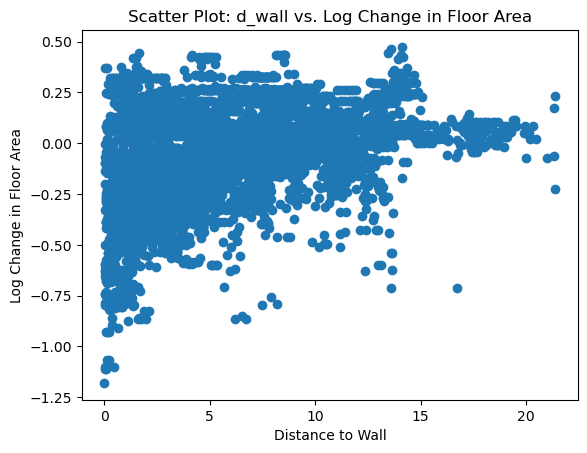

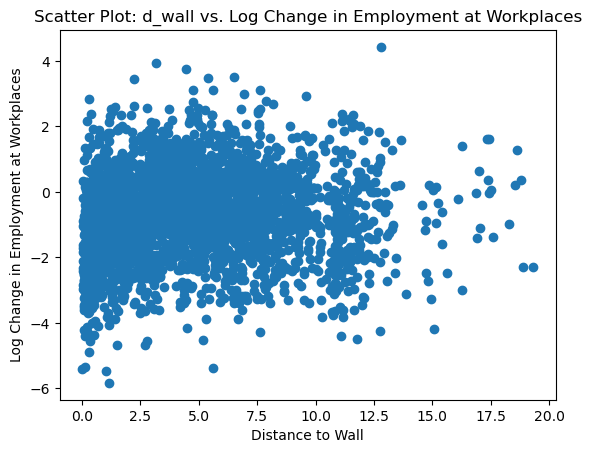

In [31]:
# Create scatter plot for d_wall vs. log change in floor area
plt.scatter(west_berlin['d_wall'], west_berlin['log_diff_floor'])
plt.xlabel('Distance to Wall')
plt.ylabel('Log Change in Floor Area')
plt.title('Scatter Plot: d_wall vs. Log Change in Floor Area')
plt.show()

# Create scatter plot for d_wall vs. log change in employment at workplaces
plt.scatter(west_berlin['d_wall'], west_berlin['log_diff_emp_wpl'])
plt.xlabel('Distance to Wall')
plt.ylabel('Log Change in Employment at Workplaces')
plt.title('Scatter Plot: d_wall vs. Log Change in Employment at Workplaces')
plt.show()

## Solution Question 1, 2a: Plotting Relationships

1. These plots should be submitted with the problem sets.
2. Are there relationships between the pairs of variables that each plot represents?

---

#### Observations:
- There seems to be a positive relationship between the distance to the inner wall and the floor price.
- There does not appear to be a close relationship between employment and distance to

# Question 2: Run Regressions
Use `statsmodels` to perform linear regressions and display summary statistics.

## Instructions:
1. Run a regression of log change in `floor_1936` and `floor_1986` on `d_cbd` for West Berlin.
2. Run a regression of log change in `floor_1936` and `floor_1986` on `d_cbd` and `area_id` for West Berlin.
3. Run a regression of log change in `floor_1936` and `floor_1986` on `d_cbd`, `d_wall`, `d_outb`, and `area_id` for West Berlin.
4. Create a categorical variable `dcell` based on thresholds of `d_cbd` and run regressions using this variable.

In [32]:
# Import statsmodels and patsy for regression analysis
from patsy import dmatrices

# Ensure all variables used in regressions are numeric and clean the data
def clean_data(df, columns):
    """Cast columns as numeric and drop rows with NaN, inf, or -inf."""
    df_cleaned = df.copy()
    for col in columns:
        df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')  # Cast as numeric
    df_cleaned = df_cleaned.replace([np.inf, -np.inf], np.nan).dropna(subset=columns)  # Drop invalid rows
    return df_cleaned

# Regression 1: Log change in floor area on d_cbd
columns_r1 = ['log_diff_floor', 'd_cbd']
west_berlin_r1 = clean_data(west_berlin, columns_r1)
formula_r1 = 'log_diff_floor ~ d_cbd'
y1, X1 = dmatrices(formula_r1, data=west_berlin_r1, return_type='dataframe')
model1 = sm.OLS(y1, X1).fit()
print(model1.summary())

# Regression 2: Log change in floor area on d_cbd and area_id
columns_r2 = ['log_diff_floor', 'd_cbd', 'area_id']
west_berlin_r2 = clean_data(west_berlin, columns_r2)
formula_r2 = 'log_diff_floor ~ d_cbd + C(area_id)'
y2, X2 = dmatrices(formula_r2, data=west_berlin_r2, return_type='dataframe')
model2 = sm.OLS(y2, X2).fit()
print(model2.summary())

# Regression 3: Log change in floor area on d_cbd, d_wall, d_outb, and area_id
columns_r3 = ['log_diff_floor', 'd_cbd', 'd_wall', 'd_outb', 'area_id']
west_berlin_r3 = clean_data(west_berlin, columns_r3)
formula_r3 = 'log_diff_floor ~ d_cbd + d_wall + d_outb + C(area_id)'
y3, X3 = dmatrices(formula_r3, data=west_berlin_r3, return_type='dataframe')
model3 = sm.OLS(y3, X3).fit()
print(model3.summary())

# Regression 4: Create categorical variable dcell based on distance to CBD thresholds
west_berlin['dcell'] = 1
west_berlin.loc[west_berlin['d_cbd'] > 1.25, 'dcell'] += 1
west_berlin.loc[west_berlin['d_cbd'] > 1.75, 'dcell'] += 1
west_berlin.loc[west_berlin['d_cbd'] > 2.25, 'dcell'] += 1
west_berlin.loc[west_berlin['d_cbd'] > 2.75, 'dcell'] += 1
west_berlin.loc[west_berlin['d_cbd'] > 3.25, 'dcell'] += 1
west_berlin.loc[west_berlin['d_cbd'] >= 3.75, 'dcell'] = 0  # Ensure dcell is 0 for d_cbd >= 3.75

# Regression 4a: Log change in floor area on dcell
columns_r4a = ['log_diff_floor', 'dcell']
west_berlin_r4a = clean_data(west_berlin, columns_r4a)
formula_r4a = 'log_diff_floor ~ C(dcell)'
y4a, X4a = dmatrices(formula_r4a, data=west_berlin_r4a, return_type='dataframe')
model4a = sm.OLS(y4a, X4a).fit()
print(model4a.summary())

# Regression 4b: Log change in floor area on dcell, area_id, d_wall, and d_outb
columns_r4b = ['log_diff_floor', 'dcell', 'area_id', 'd_wall', 'd_outb']
west_berlin_r4b = clean_data(west_berlin, columns_r4b)
formula_r4b = 'log_diff_floor ~ C(dcell) + C(area_id) + d_wall + d_outb'
y4b, X4b = dmatrices(formula_r4b, data=west_berlin_r4b, return_type='dataframe')
model4b = sm.OLS(y4b, X4b).fit()
print(model4b.summary())

                            OLS Regression Results                            
Dep. Variable:         log_diff_floor   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     4993.
Date:                Thu, 24 Jul 2025   Prob (F-statistic):               0.00
Time:                        20:24:23   Log-Likelihood:                 2096.0
No. Observations:                6260   AIC:                            -4188.
Df Residuals:                    6258   BIC:                            -4175.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4015      0.005    -73.615      0.0

## Solution Question 2: Regressions

#### (a). Regress log differences in floor prices (1936–1986) on distance from CBD, and answer the following:
1. **What is the estimated slope coefficient?**  
   - The estimated slope coefficient is approximately 0.0377.

2. **How is this coefficient interpreted?**  
   - Interpretation: As distance to CBD changes by 1 unit (km), the log difference in floor prices from 1936 to 1986 changes by 0.0377 log points. This means that for each km of distance to the CBD, there is an increase in floor price change of about 3.77 percentage points.

3. **Why is it important to look at (log) differences in prices, rather than price levels or log-levels?**  
   - By considering the change in prices, rather than the overall price level in 1986, we can control for any time-invariant determinants of price levels.

---

#### (b). Regress the log difference in floor price on distance from CBD and a dummy variable for each district.

1. **What happened to the coefficient on distance from CBD, compared to the regression in (a)?**  
   - The coefficient decreases to approximately 0.0255.

2. **What is the interpretation of the difference in coefficients?**  
   - By adding a district fixed effect, we are controlling for the average growth in prices within districts. This means that some of the increase in floor prices is related to which district a block lies in. Districts further from the pre-war CBD experienced more significant price increases, possibly due to amenities or other factors like proximity to the wall.

---

#### (c). Regress the log difference in floor price on distance from CBD, a dummy variable for each district, and the distance from the inner and outer walls.

1. **What happened to the coefficient on distance from CBD, compared to the regression in (b)?**  
   - The coefficient decreased to approximately 0.001.

2. **Why would the researcher wish to add distance from inner and outer walls to the regression?**  
   - Distance to the wall(s) may be another reason for changing land prices. If this is correlated with distance to the pre-war CBD, we may pick up a spurious correlation in our regression. Including distance to the wall as a regressor helps control for this.

---

#### (d). Compute an indicator variable for the six grid cells as defined in the paper. Repeat the regressions in (a) and (c) above, but replace the variable representing distance from CBD with the 6-grid-cell indicator.

1. **Can you see a pattern of lower prices near the pre-war CBD in the indicator variable coefficients?**  
   - Yes, this pattern is very clear.

2. **Did this pattern change much when you added the additional covariates (distance to the wall, outer wall, and district indicators)?**  
   - While the pattern didn’t change, the magnitudes changed.

3. **Is there a good reason to use the grid cell version instead of the linear specification?**  
   - Yes, because the nonlinearity in the pattern of prices seems to be present.

# Solution Question 3: Comparison to Paper

### 1. How do the regression specifications that you ran differ from the regressions in columns (1) to (3) of Table 1 in the paper?

The main difference is that in this exercise, in (1)-(3) we included a linear distance to CBD term, while in the paper, the authors used “bands.” If the effect of distance to CBD is indeed linear, our specification would be better, but if it is not linear, the band specification is a bit more flexible, allowing six coefficients to describe the effect of distance to pre-war CBD, rather than a single coefficient. If distance to the wall matters more if you are closer to the wall and less if you are further, then the band specification is probably better. The only specification which matched one of the authors’ precisely was the first specification in (4). The second specification in (4) used linear distance to the inner and outer boundaries, rather than grid cells. In any case, it does appear that the nonlinear pattern does matter.

---

### 2. Why did the authors of the paper estimate the regressions how they did?

In the paper, the authors use dummy variables to account for the distance to the (inner and outer) wall—our first plot suggested that this could be important, as distance to the wall is positively correlated with a block’s change in land prices. It’s possible that individuals did not want to live in close proximity to the wall for reasons unrelated to a lack of access to the pre-war CBD. In our regressions, we included this as a control because without it, the regression could lead us to the wrong conclusion. Notice that when we contrast column (1) to (3) in the price regression, the coefficients on distance to CBD fall in magnitude when including a measure of distance to inner and outer walls. This reflects the fact that some of the coefficient in column (1) is detecting the disamenity of living near the wall, in addition to the lack of access to the CBD, and these two distances are positively correlated.

The paper used “distance bands,” whereas in (1)-(3) we employed a linear specification. If you plot distance to the CBD against land prices, you see that land prices have a nonlinear relationship with distance to CBD. Distance bands are likely to approximate a nonlinear relationship better than a linear function will, and we can see a clear pattern with distance bands in part (4).

---

### 3. Consider land prices in the first grid cell from the Berlin Wall (0.75 km from the wall).

**What is the prediction of the model in the paper (using column (1)) on the percent change in land prices?**  
[Hint: Look for the answer in the paper.]

See page 2155: The coefficient of −0.8 on the dummy variable for the first distance band implies a 55% reduction in land prices compared to the land prices of the “excluded category,” blocks with a distance from the CBD of at least 3.75 km. We can write:

\[
E[\log(p_{86}) - \log(p_{36}) | \text{CBD}_1] - E[\log(p_{86}) - \log(p_{36}) | \text{CBD}_{\text{Excluded}}] = -0.8
\]

To compute the percent change in the land price \(((p_{86} - p_{36}) / p_{36})\) relative to the excluded category, we set \(E[\log(p_{86}) - \log(p_{36}) | \text{CBD}_{\text{Excluded}}] = 0\), and do the following calculations:

\[
\log(p_{86}) - \log(p_{36}) = -0.8
\]

\[
\log(p_{86} / p_{36}) = -0.8
\]

\[
p_{86} / p_{36} = \exp(-0.8)
\]

\[
\frac{p_{86} - p_{36}}{p_{36}} = \exp(-0.8) - 1
\]

\[
\frac{p_{86} - p_{36}}{p_{36}} = -0.55
\]